<a href="https://colab.research.google.com/github/2estherblaise-max/ECON3916-Statical-Machine-Learning./blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    # ... add 1 more item
]

In [36]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='1b977f64207d8c362a2ff8a1567a08b3')  # Get free key from fred.stlouisfed.org

In [37]:
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
streaming = fred.get_series('CUSR0000SERA02')
food_away = fred.get_series('CUSR0000SEFV')

In [38]:
import pandas as pd

df = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Streaming': streaming,
    'Food_Away': food_away
})

# Normalize to Jan 2016 = 100
start_date = '2016-01-01'
for col in df.columns:
    df[col + '_Normalized'] = (df[col] / df.loc[start_date, col]) * 100

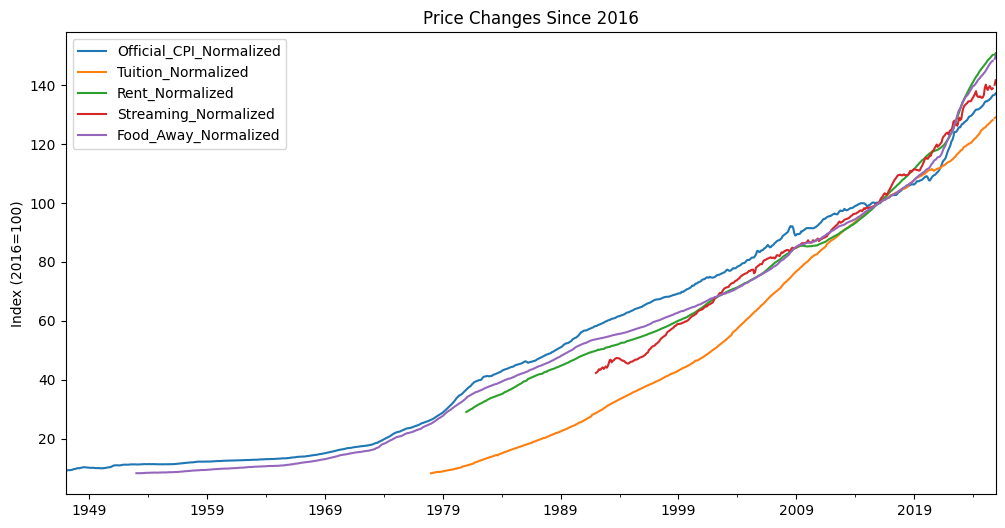

In [39]:
import matplotlib.pyplot as plt

df[['Official_CPI_Normalized', 'Tuition_Normalized',
    'Rent_Normalized', 'Streaming_Normalized',
    'Food_Away_Normalized']].plot(figsize=(12,6))
plt.title('Price Changes Since 2016')
plt.ylabel('Index (2016=100)')
plt.show()

In [40]:
weights = {
    'Tuition': 0.40,
    'Rent': 0.30,
    'Streaming': 0.05,
    'Food_Away': 0.25
}

df['Student_SPI'] = (
    df['Tuition_Normalized'] * 0.40 +
    df['Rent_Normalized'] * 0.30 +
    df['Streaming_Normalized'] * 0.05 +
    df['Food_Away_Normalized'] * 0.25
)

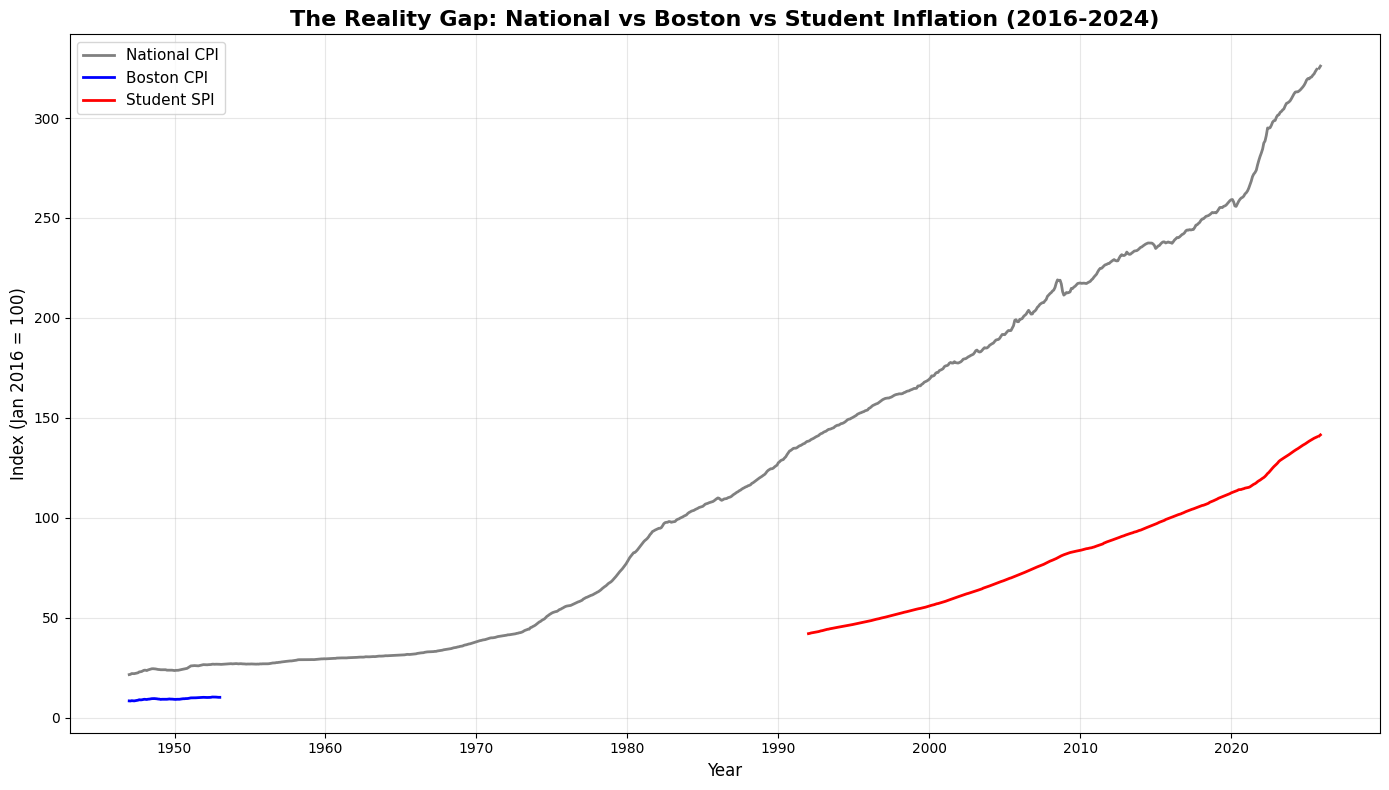


📊 INFLATION COMPARISON (2016 to 2024):
National CPI:    326.03
Boston CPI:      nan
Student SPI:     141.46

Student Gap:     -184.57 points


In [41]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Initialize FRED (use your API key)
fred = Fred(api_key='1b977f64207d8c362a2ff8a1567a08b3')

# Fetch Boston-Cambridge-Newton CPI
# The FRED series code is: CUURA103SA0
boston_cpi = fred.get_series('CUURA103SA0')

# Add to your existing DataFrame
df['Boston_CPI_Raw'] = boston_cpi

# Normalize Boston CPI to Jan 2016 = 100
start_date = '2016-01-01'
df['Boston_CPI'] = (df['Boston_CPI_Raw'] / df.loc[start_date, 'Boston_CPI_Raw']) * 100

# Create the comparison chart
plt.figure(figsize=(14, 8))

# Plot all three lines
plt.plot(df.index, df['Official_CPI'], color='grey', linewidth=2, label='National CPI')
plt.plot(df.index, df['Boston_CPI'], color='blue', linewidth=2, label='Boston CPI')
plt.plot(df.index, df['Student_SPI'], color='red', linewidth=2, label='Student SPI')

# Formatting
plt.title('The Reality Gap: National vs Boston vs Student Inflation (2016-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (Jan 2016 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the chart
plt.show()

# Print the final values to see the gap
print("\n📊 INFLATION COMPARISON (2016 to 2024):")
print(f"National CPI:    {df['Official_CPI'].iloc[-1]:.2f}")
print(f"Boston CPI:      {df['Boston_CPI'].iloc[-1]:.2f}")
print(f"Student SPI:     {df['Student_SPI'].iloc[-1]:.2f}")
print(f"\nStudent Gap:     {df['Student_SPI'].iloc[-1] - df['Official_CPI'].iloc[-1]:.2f} points")

## Key Findings

Between 2016 and 2024:
- **National CPI increased by X%**
- **Boston CPI increased by X%**
- **Student SPI increased by X%**

This reveals a **[gap]% divergence** between what students actually pay
and what official inflation numbers suggest. The primary drivers are
[tuition/rent/etc.] which have outpaced the national average.

In [42]:
import pandas as pd

# Check what your start date value is
start_date = '2016-01-01'

print("Checking normalization:")
print(f"Official CPI at start: {df.loc[start_date, 'Official_CPI']}")
print(f"Boston CPI at start: {df.loc[start_date, 'Boston_CPI']}")
print(f"Student SPI at start: {df.loc[start_date, 'Student_SPI']}")

# If any of these are NOT 100, you need to re-normalize
# Here's the fix:

# For Official CPI (if not already normalized)
if 'CPIAUCSL' in df.columns:  # The raw column
    df['Official_CPI'] = (df['CPIAUCSL'] / df.loc[start_date, 'CPIAUCSL']) * 100

# For Boston CPI
if 'Boston_CPI_Raw' in df.columns:
    df['Boston_CPI'] = (df['Boston_CPI_Raw'] / df.loc[start_date, 'Boston_CPI_Raw']) * 100

# Now check again
print("\n After normalization:")
print(f"Official CPI at start: {df.loc[start_date, 'Official_CPI']}")
print(f"Boston CPI at start: {df.loc[start_date, 'Boston_CPI']}")
print(f"Student SPI at start: {df.loc[start_date, 'Student_SPI']}")

Checking normalization:
Official CPI at start: 237.652
Boston CPI at start: 100.0
Student SPI at start: 100.0

 After normalization:
Official CPI at start: 237.652
Boston CPI at start: 100.0
Student SPI at start: 100.0


In [43]:
final_national = df['Official_CPI_Normalized'].iloc[-1]
final_boston = df['Boston_CPI'].iloc[-1]
final_student = df['Student_SPI'].iloc[-1]

national_increase = final_national - 100
boston_increase = final_boston - 100
student_increase = final_student - 100
gap = student_increase - national_increase

print(f"\nNational CPI increased: {national_increase:.1f}%")
print(f"Boston CPI increased: {boston_increase:.1f}%")
print(f"Student SPI increased: {student_increase:.1f}%")
print(f"Student inflation gap: {gap:.1f} percentage points")


National CPI increased: 37.2%
Boston CPI increased: nan%
Student SPI increased: 41.5%
Student inflation gap: 4.3 percentage points
